In [1]:
%matplotlib inline
import torch
from torch import nn
from torch_intermediate_layer_getter import IntermediateLayerGetter as MidGetter

import matplotlib.pyplot as plt
import numpy as np
import math, time


In [2]:
#Specify device 
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [3]:
from torch.utils.data import DataLoader
from functions_geometry.get_dataset import MNISTRotated

train_data = MNISTRotated(path_to_data='./data/mnist_rot/train_all.npz')
test_data = MNISTRotated(path_to_data='./data/mnist_rot/test.npz')

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [4]:
# HYPERPARAMETERS
BATCH_SIZE = 64 #batch size of mini-batches for training, test
LEARNING_RATE = 1e-2
EPOCHS= 5
NUMCHAN = 30

In [5]:
from models.cnn_mlp_classifier import CNNMLPModel
# Create model, define loss, optimizer
torch.manual_seed(0)
model = CNNMLPModel(bn_train=True, conv_bias=False,numchan=NUMCHAN).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

Using mps device


In [6]:
model

CNNMLPModel(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (4): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (8): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (11): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=1920, out_features=20, bias=True)
    (15): BatchNorm1d(20, eps=1e-05, momentum=0.1, affin

In [7]:
num_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the number of trainable parameters
print(num_trainable_params)

63480


In [8]:
# !conda env config vars set PYTORCH_ENABLE_MPS_FALLBACK=1

In [9]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [10]:
from functions_geometry.utils import compute_manifold_properties
layer_types = ['Conv2d', 'MaxPool2d', 'Linear']
capacities_init, radii_init, dimensions_init, correlations_init, layernames_all =compute_manifold_properties(model, train_data, sampled_classes=10, \
                                                                                                             examples_per_class=50, layer_types=layer_types)

Projecting layer_0_Input
Projecting layer_1_Conv2d
Projecting layer_4_Conv2d
Projecting layer_7_MaxPool2d
Projecting layer_8_Conv2d
Projecting layer_11_Conv2d
Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +1.2788962975431035e+01    2.10154244e+00    
   2         +1.1063953179556666e+01    4.09575239e+00    
   3         +1.0745703698844087e+01    4.03716237e+00    
   4         +1.0624457643293242e+01    3.99944540e+00    
   5         +1.0389961932089081e+01    3.88796283e+00    
   6         +9.9620773098965607e+00    3.52164191e+00    
   7         +9.3444956205640963e+00    2.46311286e+00    
   8         +8.8713284263945251e+00    2.12680627e+00    
   9         +8.5683681477887212e+00    1.91251273e+00    
  10         +8.3935399768457550e+00    1.36574188e+00    
  11         +8.3148274988792004e+00    8.26198808e-01    
  12         +8.2909270215739603e+00    5.91299890e-01    
 

In [11]:
from functions_geometry.train_test import train, test

train_loss_epoch = [None for i in range(EPOCHS)]
test_loss_epoch = [None for i in range(EPOCHS)]

train_acc_epoch = [None for i in range(EPOCHS)]
test_acc_epoch = [None for i in range(EPOCHS)]


torch.manual_seed(0)
for t in range(EPOCHS):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss_epoch[t], train_acc_epoch[t] = train(train_dataloader, model, loss_fn, optimizer)
    if t==EPOCHS-1:
        test_loss_epoch[t], test_acc_epoch[t] = test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297012, accuracy: 9.375000  [   64/12000]
loss: 1.652559, accuracy: 50.000000  [ 1344/12000]
loss: 1.282501, accuracy: 57.812500  [ 2624/12000]
loss: 0.880540, accuracy: 75.000000  [ 3904/12000]
loss: 0.904693, accuracy: 73.437500  [ 5184/12000]
loss: 0.705029, accuracy: 76.562500  [ 6464/12000]
loss: 0.580282, accuracy: 82.812500  [ 7744/12000]
loss: 0.343263, accuracy: 92.187500  [ 9024/12000]
loss: 0.547992, accuracy: 87.500000  [10304/12000]
loss: 0.552472, accuracy: 84.375000  [11584/12000]
Epoch 2
-------------------------------
loss: 0.376954, accuracy: 87.500000  [   64/12000]
loss: 0.304211, accuracy: 89.062500  [ 1344/12000]
loss: 0.445679, accuracy: 85.937500  [ 2624/12000]
loss: 0.586648, accuracy: 84.375000  [ 3904/12000]
loss: 0.434800, accuracy: 87.500000  [ 5184/12000]
loss: 0.800595, accuracy: 78.125000  [ 6464/12000]
loss: 0.181441, accuracy: 95.312500  [ 7744/12000]
loss: 0.257883, accuracy: 92.187500  [ 9024/12000]
los

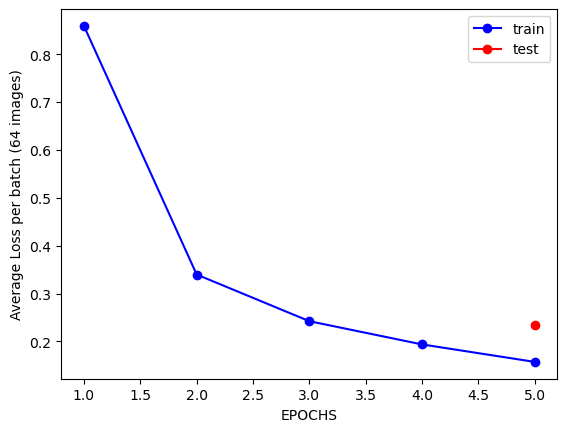

In [12]:
plt.plot(torch.arange(1,EPOCHS+1), [torch.mean(torch.tensor(train_loss_epoch[k])) for k in range(EPOCHS)], 'bo-', label='train')
plt.plot(torch.arange(1,EPOCHS+1), test_loss_epoch, 'ro-', label='test')
plt.xlabel("EPOCHS")
plt.ylabel("Average Loss per batch (64 images)")
plt.legend()

In [13]:
#save model weights
# torch.save(model.state_dict(), './results/cnn_mlp_model_weights.pth')

In [14]:
capacities_final, radii_final, dimensions_final, correlations_final, layernames_all =compute_manifold_properties(model, train_data, sampled_classes=10, examples_per_class=50, layer_types=layer_types)

Projecting layer_0_Input
Projecting layer_1_Conv2d
Projecting layer_4_Conv2d
Projecting layer_7_MaxPool2d
Projecting layer_8_Conv2d
Projecting layer_11_Conv2d
Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +1.2788962975431035e+01    2.10154244e+00    
   2         +1.1063953179556666e+01    4.09575239e+00    
   3         +1.0745703698844087e+01    4.03716237e+00    
   4         +1.0624457643293242e+01    3.99944540e+00    
   5         +1.0389961932089081e+01    3.88796283e+00    
   6         +9.9620773098965607e+00    3.52164191e+00    
   7         +9.3444956205640963e+00    2.46311286e+00    
   8         +8.8713284263945251e+00    2.12680627e+00    
   9         +8.5683681477887212e+00    1.91251273e+00    
  10         +8.3935399768457550e+00    1.36574188e+00    
  11         +8.3148274988792004e+00    8.26198808e-01    
  12         +8.2909270215739603e+00    5.91299890e-01    
 

In [16]:
# np.savez('./results/cnn_mlp_objmanifolds_allclasses.npz', capacities_init=capacities_init, radii_init=radii_init, dimensions_init=dimensions_init, correlations_init=correlations_init,\
#          capacities_final=capacities_final, radii_final=radii_final, dimensions_final=dimensions_final, correlations_final=correlations_final, layernames_all=list(layernames_all))